In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize

In [6]:
k=0.562
mu=1
tmax=10
s0=3
r=np.random.rand()
def f(t):
    return np.log(r)+(k*s0*t+0.5*mu*t**2)
sol = optimize.root(f, [0, 2])
sol.x[0]

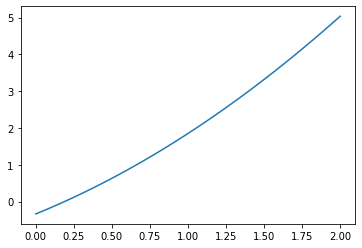

In [9]:
t=np.linspace(0,2,100)
plt.plot(t,f(t))



0.18821697631314052

In [22]:
#escenario3
k=0.562
mu=1
tmax=10
s0=3
dt=0.1
ncells=50
nsteps=100

means=pd.DataFrame(columns=['time','Mean','MeanErr','Cv2','Cv2err'])

sizesarr=np.empty([ncells,100])

df=None

for m in range(ncells):
    s=s0
    t=0
    n=0
    tau=0
    while n<nsteps:
        r=np.random.rand()
        def f(t):
            return np.log(r)+(k*s0*t+0.5*mu*t**2)
        sol = optimize.root(f, [0, 2])
        tau+=sol.x[0]
        ss=s+mu*tau#tamano al dividirse
        
        while t+dt<tau and t+dt<tmax:            
            sizesarr[m,n]=s
            s+=mu*dt
            t+=dt
            n+=1
            print(t,s)
        sizesarr[m,n]=s
        s=ss/2+mu*(t+dt-tau)
        t+=dt
        n+=1






0.1 3.1
0.2 3.2
0.30000000000000004 3.3000000000000003
0.4 3.4000000000000004
0.5 3.5000000000000004
0.6 3.6000000000000005
0.7 3.7000000000000006
0.7999999999999999 3.8000000000000007
0.8999999999999999 3.900000000000001
0.9999999999999999 4.000000000000001
1.2 2.1986132132427163
1.3 2.2986132132427164
1.4000000000000001 2.3986132132427165
1.5000000000000002 2.4986132132427166
1.6000000000000003 2.5986132132427167
1.7000000000000004 2.6986132132427167
1.8000000000000005 2.798613213242717
2.0000000000000004 2.1083224948936556
2.1000000000000005 2.2083224948936557
2.2000000000000006 2.308322494893656
2.600000000000001 2.5648248074822777
2.700000000000001 2.664824807482278
2.800000000000001 2.764824807482278
3.0000000000000013 2.7903757198655312
3.1000000000000014 2.8903757198655313
3.4000000000000017 3.2626867754174995
3.5000000000000018 3.3626867754174996
3.600000000000002 3.4626867754174997
3.700000000000002 3.5626867754175
3.800000000000002 3.6626867754175
3.900000000000002 3.7626867

IndexError: index 100 is out of bounds for axis 1 with size 100

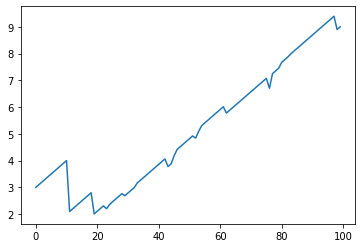

In [23]:
plt.plot(sizesarr[0,:])

In [ ]:
mean_cntr, var_cntr, std_cntr = bayesest(df.time,alpha=0.95)
meanarr[i]=np.mean(df.time)
meanerr[i]=mean_cntr[1][1]-mean_cntr[0]
noisearr[i]=(np.var(df.time)/np.mean(df.time)**2)
errv=(var_cntr[1][1]-var_cntr[0])/mean_cntr[0]**2+2*(mean_cntr[1][1]-mean_cntr[0])*var_cntr[0]/mean_cntr[0]**3
noiseerr[i]=errv
i+=1

df=pd.DataFrame({'c0':car,'MeanSim':meanarr,
            'Meanerr':meanerr,'cv2Sim':noisearr,'cv2err':noiseerr})